In [5]:
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import zarr

## Opening the Zarr logo using PIL

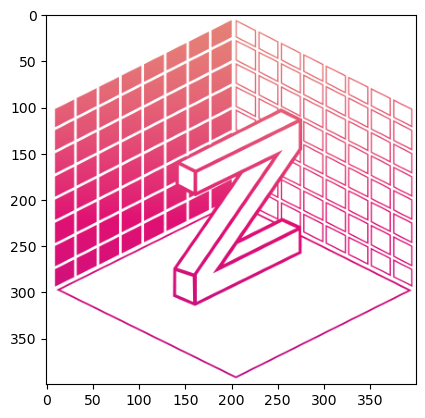

In [10]:
image = Image.open("/opt/zarr-logo/zarr-pink-horizontal-white.png")
box = (100, 400, 500, 800)
crop = image.crop(box)
pyplot.imshow(crop)

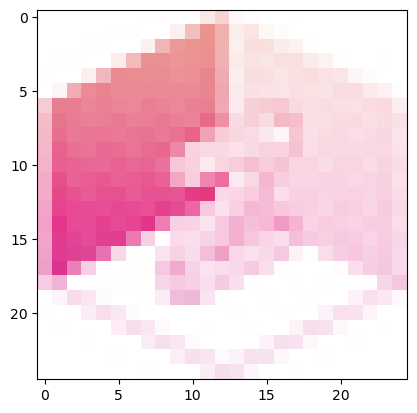

In [43]:
basewidth = 25
wpercent = (basewidth/float(crop.size[0]))
hsize = int((float(crop.size[1])*float(wpercent)))
shrunk = crop.resize((basewidth, hsize), Image.Resampling.LANCZOS)
pyplot.imshow(shrunk)

## Converting the Zarr logo into NumPy array using [asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) function

In [38]:
numpydata = asarray(shrunk)
print(numpydata.shape)

(50, 50, 4)


## Converting NumPy array into Zarr array using [zarr.array](https://zarr.readthedocs.io/en/stable/api/creation.html#zarr.creation.array) function

In [39]:
zarr_logo_zarr = zarr.array(numpydata)

In [40]:
zarr_logo_zarr.info

Type,zarr.core.Array
Data type,uint8
Shape,"(50, 50, 4)"
Chunk shape,"(50, 50, 4)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.KVStore
No. bytes,10000 (9.8K)
No. bytes stored,7065 (6.9K)
Storage ratio,1.4


## Saving Zarr array (Zarr Pixel Logo)

In [41]:
zarr.save("zarr_logo_temp.zarr", zarr_logo_zarr)

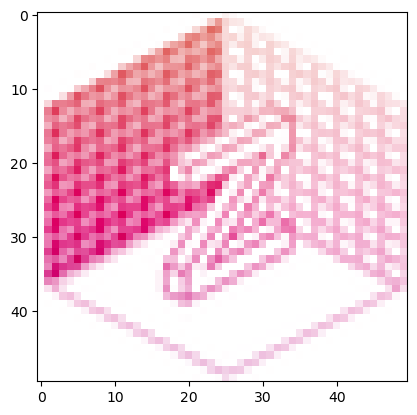

In [42]:
pyplot.imshow(zarr_logo_zarr)